<a href="https://colab.research.google.com/github/VarelYonathan/Data-Analysis-Project---Bike-Rentals-Dataset/blob/main/Proyak_Akhir_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Varel Yonathan Simangunsong

Username: varelys

Email : varely.simangunsong@gmail.com

In [ ]:
# import libraries
from google.colab import drive
import zipfile
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

#1. Data Wrangling


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_zip = '/content/drive/MyDrive/Learning/Dicoding/Dataset/Bike-sharing-dataset.zip'
target_directory = '/content/data'

with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(target_directory)


In [ ]:
# data assessing
day = pd.read_csv('data/day.csv')
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# cek missing value dan duplicate
print("Jumlah missing value: ",day.isnull().sum())
print("Jumlah duplicated data: ",day.duplicated().sum())

Jumlah missing value:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplicated data:  0


In [ ]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan percobaan di atas, data day bersih

In [ ]:
hour = pd.read_csv('data/hour.csv')
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# cek missing value dan duplicate
print("Jumlah missing value: ",hour.isnull().sum())
print("Jumlah duplicated data: ",hour.duplicated().sum())

Jumlah missing value:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplicated data:  0


In [ ]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan percobaan di atas, data hour juga bersih

#2. Exploratory Data Analysis

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Pertanyaan:

1. Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?
2. Pada bulan apa sepeda paling banyak dipinjam pada tahun 2011 dan 2012?

In [ ]:
day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
# jumlah peminjaman berdasarkan cuaca
day.groupby(by='weathersit').instant.nunique().sort_values(ascending=False).reset_index()

,weathersit,instant
0,1,463
1,2,247
2,3,21


In [ ]:
# lama peminjaman berdasarkan cuaca
hour.groupby(by='weathersit').instant.nunique().sort_values(ascending=False).reset_index()

,weathersit,instant
0,1,11413
1,2,4544
2,3,1419
3,4,3


In [ ]:
filtered_hour_weather_4 = hour[hour['weathersit'] == 4]

print(filtered_hour_weather_4)

      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
585       586  2011-01-26       1   0     1  16        0        3           1   
8854     8855  2012-01-09       1   1     1  18        0        1           1   
9123     9124  2012-01-21       1   1     1   1        0        6           0   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
585            4  0.22  0.1970  0.93     0.3284       1          35   36  
8854           4  0.20  0.2273  0.86     0.0896       6         158  164  
9123           4  0.14  0.1364  0.86     0.1940       1          22   23  


In [ ]:
filtered_day_weather_4 = day[(day['instant'] == 586) | (day['instant'] == 8855) | (day['instant'] == 9124)]

print(filtered_day_weather_4)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
585      586  2012-08-08       3   1     8        0        3           1   

     weathersit  temp     atemp       hum  windspeed  casual  registered   cnt  
585           2  0.75  0.707717  0.672917     0.1107    1263        6271  7534  


In [ ]:
filtered_day_weather_4 = day[(day['dteday'] == '2011-01-26') | (day['dteday'] == '2012-01-09') | (day['dteday'] == '2012-01-21')]

print(filtered_day_weather_4)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
25        26  2011-01-26       1   0     1        0        3           1   
373      374  2012-01-09       1   1     1        0        1           1   
385      386  2012-01-21       1   1     1        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
25            3  0.217500  0.203600  0.862500   0.293850      34         472   
373           2  0.224167  0.247479  0.701667   0.098900     106        2270   
385           2  0.173333  0.174875  0.831250   0.222642      67        1234   

      cnt  
25    506  
373  2376  
385  1301  


In [ ]:
filtered_hour = hour[(hour['dteday'] == '2011-01-26') | (hour['dteday'] == '2012-01-09') | (hour['dteday'] == '2012-01-21')]

print(filtered_hour_weather_4)

      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
585       586  2011-01-26       1   0     1  16        0        3           1   
8854     8855  2012-01-09       1   1     1  18        0        1           1   
9123     9124  2012-01-21       1   1     1   1        0        6           0   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
585            4  0.22  0.1970  0.93     0.3284       1          35   36  
8854           4  0.20  0.2273  0.86     0.0896       6         158  164  
9123           4  0.14  0.1364  0.86     0.1940       1          22   23  


In [ ]:
day.dteday.nunique()

731

In [ ]:
hour.dteday.nunique()

731

In [ ]:
day['cnt'].head(10)

0     985
1     801
2    1349
3    1562
4    1600
5    1606
6    1510
7     959
8     822
9    1321
Name: cnt, dtype: int64

In [ ]:
print("Jumlah peminjam berdasarkan hari :",day['cnt'].sum())

Jumlah peminjam berdasarkan hari : 3292679


In [ ]:
day.groupby(by='weathersit').cnt.sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


In [ ]:
hour.groupby(by='weathersit').cnt.sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


Hari dan jam peminjaman pada data day dan hour sama, tetapi sisanya berbeda

In [ ]:
day.groupby(by=['yr','mnth']).agg({
    "cnt":"sum"
})

cnt
yr mnth        
0  1      38189
   2      48215
   3      64045
   4      94870
   5     135821
   6     143512
   7     141341
   8     136691
   9     127418
   10    123511
   11    102167
   12     87323
1  1      96744
   2     103137
   3     164875
   4     174224
   5     195865
   6     202830
   7     203607
   8     214503
   9     218573
   10    198841
   11    152664
   12    123713

#3. Visualisasi Data

weathersit :

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

weather_labels = {
		1: 'Clear',
		2: 'Misty',
		3: 'Light rain',
		4: 'Heavy Rain'
}

day['weather_label'] = day['weathersit'].map(weather_labels)
hour['weather_label'] = hour['weathersit'].map(weather_labels)

In [ ]:
def format_large_numbers(x, pos):
    return '{:,.0f}'.format(x)

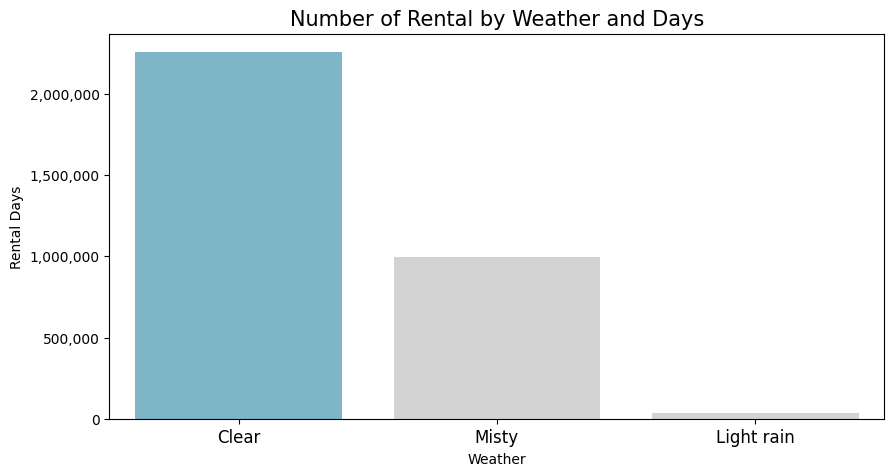

In [ ]:
weather_day_df = day.groupby(by="weather_label").cnt.sum().reset_index()

plt.figure(figsize=(10, 5))

ax = sns.barplot(
    y="cnt",
    x="weather_label",
    data=weather_day_df.sort_values(by="cnt", ascending=False),
    palette=colors
)

formatter = FuncFormatter(format_large_numbers)
ax.yaxis.set_major_formatter(formatter)

plt.title("Number of Rental by Weather and Days", loc="center", fontsize=15)
plt.ylabel("Rental Days")
plt.xlabel("Weather")
plt.tick_params(axis='x', labelsize=12)
plt.show()

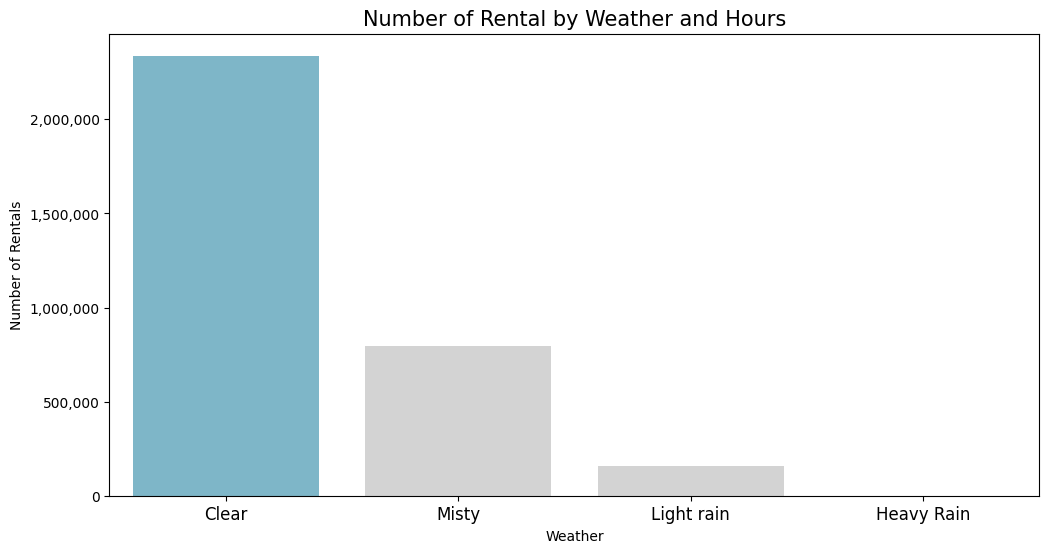

In [ ]:
weather_hour_df = hour.groupby(by="weather_label").cnt.sum().reset_index()

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    y="cnt",
    x="weather_label",
    data=weather_hour_df.sort_values(by="cnt", ascending=False),
    palette=colors
)


formatter = FuncFormatter(format_large_numbers)
ax.yaxis.set_major_formatter(formatter)

plt.title("Number of Rental by Weather and Hours", loc="center", fontsize=15)
plt.ylabel("Number of Rentals")
plt.xlabel("Weather")
plt.tick_params(axis='x', labelsize=12)
plt.show()

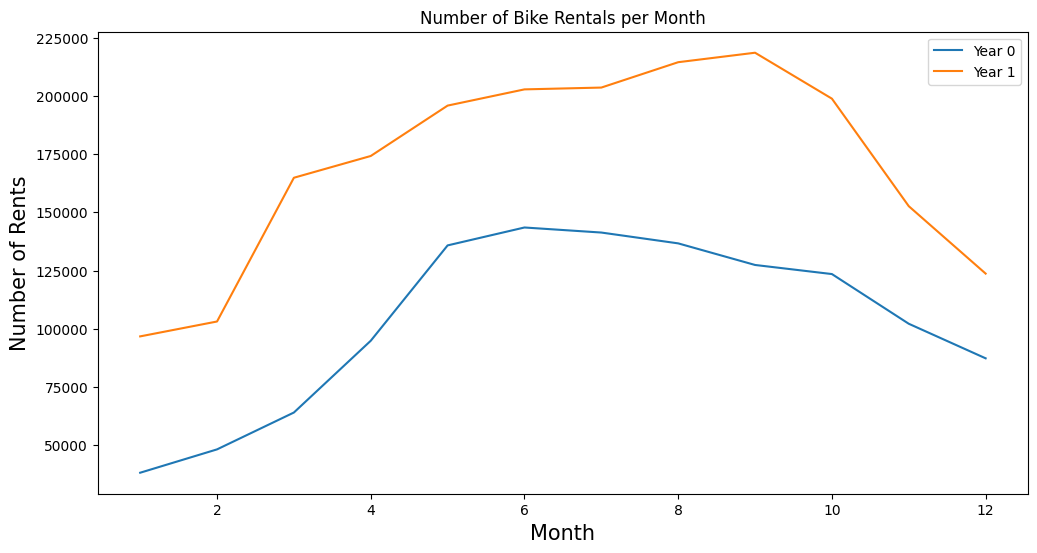

In [ ]:
rentals_per_month = day.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))

for year in [0, 1]:
    year_data = rentals_per_month[rentals_per_month['yr'] == year]
    plt.plot(year_data['mnth'], year_data['cnt'], label=f'Year {year}')

plt.xlabel('Month',size=15)
plt.ylabel('Number of Rents',size=15)
plt.title('Number of Bike Rentals per Month')
plt.legend()
plt.show()

In [ ]:
day.to_csv("day.csv", index=False)

In [ ]:
hour.to_csv("hour.csv", index=False)